In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd
from scipy.spatial import distance

# 1.0

In [3]:
SampleSet = range(3)
SubSeq = np.array([2,0,1])
n = 10000
z = np.random.choice(SampleSet,n)

In [4]:
start = time.time()
cnt = 0
for i in range(n-2):
    if z[i]==2 and z[i+1]==0 and z[i+2]==1:
        cnt=cnt+1
end= time.time()
print('runtime: ' ,end-start)
print('number of apparences of (2,0,1): ',cnt)

runtime:  0.015626907348632812
number of apparences of (2,0,1):  376


In [5]:
start = time.time()
Shift1=np.roll(z,n-1)
Shift2=np.roll(z,n-2)
Shift1[n-1],Shift2[n-1],Shift2[n-2]=-99999,-99999,-99999
ans=np.logical_and(Shift2==1,np.logical_and(z==2,Shift1==0))
end= time.time()
print('runtime: ' ,end-start)
print('number of apparences of (2,0,1): ',cnt)

runtime:  0.01498723030090332
number of apparences of (2,0,1):  376


# 1.1a

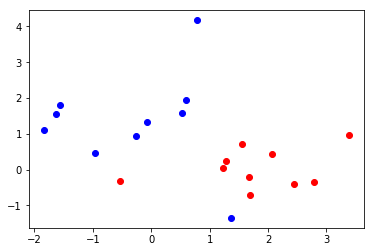

In [6]:
SampleSize = 10
meana=np.array([1.5, 0])
meanb= np.array([0,1.5])
var=np.eye(2,2)
a= np.random.multivariate_normal(meana, var, SampleSize)
b= np.random.multivariate_normal(meanb, var, SampleSize)
plt.plot(a[:,0],a[:,1],'ro')
plt.plot(b[:,0],b[:,1],'bo')
plt.show()

# 1.1b

(100, 2)
(100, 3)


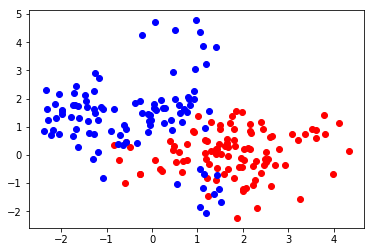

In [7]:
SampleSet = range(10)
n = 100
Indx = np.random.choice(SampleSet,2*n)
eps1=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
eps2=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
x1= a[Indx[0:n]]+eps1
x2= b[Indx[n:2*n]]+eps2
print(x1.shape)

x1=np.insert(x1,2,1,axis=1)

print(x1.shape)
x2= np.insert(x2,2,0,axis=1)

Data1 = np.concatenate((x1,x2))
plt.plot(Data1[0:n,0],Data1[0:n,1],'ro',Data1[n:2*n,0],Data1[n:2*n,1],'bo')
plt.show()

# 1.2

In [8]:
# Solve LLS
# returns coefficients for classifiying line a_0x_0 + ... + a_(d-1)x_(d-1) + a_d = 0.5
def LLS(X): #X a (n,d) numpy array with d-1 dependent variables and 1 independent variable
    n = X.shape[0]
    d = X.shape[1]
    X = np.insert(X,d-1,1,axis=1) # add column of 1s for constant term
    x = X[:,0:d] # dependent variable
    y = X[:,d] # independent variable
    y=y.reshape(n,1)
    c=x.T@x
    return(np.linalg.solve(c,x.T@y)) 

In [9]:
# Gives a scatter plot of labeled data with Sperating Hyperplane
# Input should be a (n,3) matrix with the first 2 columns the dependent variables and the last column the dependent variable (should be 0s and 1s)
def conplot(X):
    alpha=LLS(X)
    maxx = np.amax(X[:,0])
    maxy = np.amax(X[:,1])
    minx = np.amin(X[:,0])
    miny = np.amin(X[:,1])
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s, sparse=True)
    z = alpha[1,0]*q+alpha[0,0]*p + alpha[2,0]
    h = plt.contourf(t,s,z,[-99999,0.5,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(X[X[:,2]==1][:,0],X[X[:,2]==1][:,1],'ro',X[X[:,2]==0][:,0],X[X[:,2]==0][:,1],'bo')

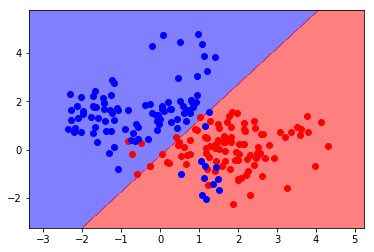

In [10]:
conplot(Data1)
plt.show()

# 1.3

In [11]:
# Confusion Matrix
#Prints out the Confusion Matrix and the Accuracy and returns the Confusion Matrix
def confusion(X,alpha):
    n=X.shape[0]
    d=X.shape[1]-1
    Xevaled = X[:,0:d].dot(alpha[0:d,0])+alpha[d,0]
    C10=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==0))
    C00=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==0))
    C01=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==1))
    C11=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==1))
    C=[[C00,C01],[C10,C11]]
    print("Confusion matrix: ", C)
    print("accuracy: " , np.trace(C)/n)
    return(C)

In [12]:
confusion(Data1,LLS(Data1))

Confusion matrix:  [[88, 8], [12, 92]]
accuracy:  0.9


[[88, 8], [12, 92]]

# 1.4

In [13]:


n = 10000 # number of samples

#Create Random Data around sample from 1.1
SampleSet = range(SampleSize)
Indx = np.random.choice(SampleSet,2*n)
eps1=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
eps2=np.random.multivariate_normal([0,0], 1/4*np.eye(2,2), n)
x1= a[Indx[0:n]]+eps1
x2= b[Indx[n:2*n]]+eps2

#label Data
x1= np.insert(x1,2,1,axis=1)
x2= np.insert(x2,2,0,axis=1)
Data2 = np.concatenate((x1,x2))

alpha = LLS(Data2)

C=confusion(Data2,alpha)

Confusion matrix:  [[8787, 1005], [1213, 8995]]
accuracy:  0.8891


# 1.5

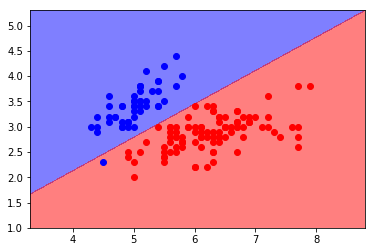

Confusion matrix:  [[50, 0], [0, 100]]
accuracy:  1.0


[[50, 0], [0, 100]]

In [14]:
#load data
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame1 = pd.read_csv(url , header=None)

#label Data (versicolor , virginica = 1, setosa = 0)
irisDataFrame1['label'] = irisDataFrame1.iloc[:,4].isin(['Iris-versicolor','Iris-virginica']).astype(int)

# plot based on 1st 2 attributes
IrisArray1 = np.array(irisDataFrame1.loc[:,[0,1,'label']])
conplot(IrisArray1)
plt.show()

# accuracy based on all attributes
IrisArray2 = np.array(irisDataFrame1.loc[:,[0,1,2,3,'label']])
confusion(IrisArray2,LLS(IrisArray2))

# 1.6

In [211]:
def J(a,x,y):
    n=x.shape[0]
    return (1/n)*np.sum((x@a-y)**2)
    
def GradJ(a,x,y):
    n=x.shape[0]
    return (2/n)*np.sum((x.dot(a)-y)*x,axis=0).reshape(a.shape)

def LLSGrad(X,nu,graph,a):
    n = X.shape[0]
    d = X.shape[1]
    X = np.insert(X,d-1,1,axis=1) # add column of 1s for constant term
    x = X[:,0:d] # dependent variable
    y = X[:,d].reshape(n,1) # independent variable
    
    maxSteps=np.ceil(10/nu)
    tol = 0.001
    
    step = 0
    Vals = np.array([[step],[J(a,x,y)]])
    while (np.sum(np.abs(GradJ(a,x,y)))>tol ) and (step < maxSteps):
        a = a - nu * GradJ(a,x,y)
        step = step + 1
        if graph:
            Vals=np.concatenate((Vals,np.array([[step],[J(a,x,y)]])),axis=1)
        if(step==maxSteps):
            return np.zeros(1)
    if graph:                        
        return Vals
    return(a)


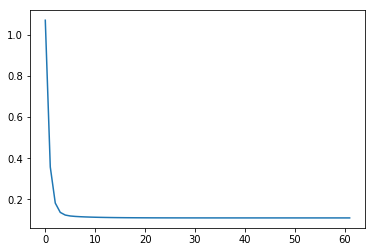

In [212]:
nu=1 
d = Data1.shape[1]
a= np.random.rand(d).reshape(d,1)
MaxNu=4
count=0
while (np.all(LLSGrad(Data1,nu,False,a))==np.array([0])) and (count < MaxNu):
    nu=nu*0.1
    count = count + 1
if (count == MaxNu):
    print('Failed to converge')
else:
    Vals = LLSGrad(Data1,nu,True,a)
    plt.plot(Vals[0,:],Vals[1,:])
    plt.show()

# 1.7

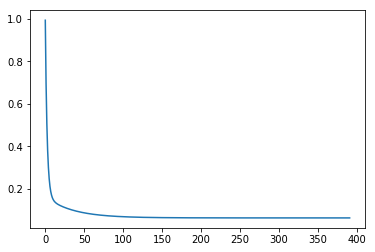

In [17]:
IrisMean = np.mean(IrisArray2[:,:4], 0)
IrisSD = np.std(IrisArray2[:,:4],0)
normIris = np.divide(np.subtract(IrisArray2[:,:4], IrisMean), IrisSD)

nu=1 
d = normIris.shape[1]
a= np.random.rand(d).reshape(d,1)
MaxNu=10
count=0
while (np.all(LLSGrad(normIris,nu,False,a))==np.array([0])) and (count < MaxNu):
    nu=nu*0.1
    count = count + 1

if (count == MaxNu):
    print('Failed to converge')
else:
    Vals = LLSGrad(normIris,nu,True,a)
    plt.plot(Vals[0,:],Vals[1,:])
    plt.show()


# 1.8

In [18]:
#k nearest neighbours algorithm for X 'known' data and Y 'unknown'
def nearNeigh(k,Y,X):
    n = X.shape[0]
    d = X.shape[1]
    
    eucDist = distance.cdist(Y,X[:,:-1])
    
    nearest = np.argpartition(eucDist,k,axis=1)[:,:k]
    
    avVal = np.zeros(Y.shape[0])
    for i in range(Y.shape[0]):
        avVal[i] = np.sum(X[nearest[i], d-1])
        avVal[i] = avVal[i]/k
    
    return avVal

In [19]:
# Confusion Matrix
#Prints out the Confusion Matrix and the Accuracy and returns the Confusion Matrix
def confusionkNN(X,Xevaled):
    n=X.shape[0]
    d=X.shape[1]-1
    C10=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==0))
    C00=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==0))
    C01=np.sum(np.logical_and([Xevaled<0.5],X[:,d]==1))
    C11=np.sum(np.logical_and([Xevaled>0.5],X[:,d]==1))
    C=[[C00,C01],[C10,C11]]
    print("Confusion matrix: ", C)
    print("accuracy: " , np.trace(C)/n)
    return(C)

In [20]:
#running k N.N. for k=1,15,30 
nearNeigh(1,Data1[:,:-1],Data1)
confusionkNN(Data1, nearNeigh(1,Data1[:,:-1],Data1))
nearNeigh(15,Data1[:,:-1],Data1)
confusionkNN(Data1, nearNeigh(15,Data1[:,:-1],Data1))
nearNeigh(30,Data1[:,:-1],Data1)
confusionkNN(Data1, nearNeigh(30,Data1[:,:-1],Data1))

Confusion matrix:  [[100, 0], [0, 100]]
accuracy:  1.0
Confusion matrix:  [[90, 5], [10, 95]]
accuracy:  0.925
Confusion matrix:  [[89, 5], [11, 95]]
accuracy:  0.92


[[89, 5], [11, 95]]

In [213]:
def plotkNNcon(X):
    maxx = np.amax(X[:,0])
    maxy = np.amax(X[:,1])
    minx = np.amin(X[:,0])
    miny = np.amin(X[:,1])
    t = np.arange(minx-1, maxx+1, 0.1)
    s = np.arange(miny-1, maxy+1, 0.1)
    p,q = np.meshgrid(t, s, sparse=True)
    
    z = alpha[1,0]*q+alpha[0,0]*p + alpha[2,0]
    h = plt.contourf(t,s,z,[-99999,0.5,99999], colors=['blue','red'],alpha=0.5)
    plt.plot(X[X[:,2]==1][:,0],X[X[:,2]==1][:,1],'ro',X[X[:,2]==0][:,0],X[X[:,2]==0][:,1],'bo')


# 1.9(a)

In [22]:
accuracy1 = np.zeros(200)
n = Data1.shape[0]
for k in range(199):
    C = confusionkNN(Data1, nearNeigh(k+1,Data1[:,:-1],Data1))
    accuracy1[k]= np.trace(C)/n

Confusion matrix:  [[100, 0], [0, 100]]
accuracy:  1.0
Confusion matrix:  [[89, 0], [0, 91]]
accuracy:  0.9
Confusion matrix:  [[94, 5], [6, 95]]
accuracy:  0.945
Confusion matrix:  [[92, 2], [2, 92]]
accuracy:  0.92
Confusion matrix:  [[95, 7], [5, 93]]
accuracy:  0.94
Confusion matrix:  [[90, 4], [4, 90]]
accuracy:  0.9
Confusion matrix:  [[94, 8], [6, 92]]
accuracy:  0.93
Confusion matrix:  [[94, 5], [5, 91]]
accuracy:  0.925
Confusion matrix:  [[94, 7], [6, 93]]
accuracy:  0.935
Confusion matrix:  [[92, 5], [6, 93]]
accuracy:  0.925
Confusion matrix:  [[93, 5], [7, 95]]
accuracy:  0.94
Confusion matrix:  [[91, 5], [6, 93]]
accuracy:  0.92
Confusion matrix:  [[92, 6], [8, 94]]
accuracy:  0.93
Confusion matrix:  [[90, 5], [8, 93]]
accuracy:  0.915
Confusion matrix:  [[90, 5], [10, 95]]
accuracy:  0.925
Confusion matrix:  [[90, 5], [8, 94]]
accuracy:  0.92
Confusion matrix:  [[92, 5], [8, 95]]
accuracy:  0.935
Confusion matrix:  [[89, 5], [8, 95]]
accuracy:  0.92
Confusion matrix:  [[

Confusion matrix:  [[85, 7], [15, 93]]
accuracy:  0.89
Confusion matrix:  [[83, 7], [15, 93]]
accuracy:  0.88
Confusion matrix:  [[85, 7], [15, 93]]
accuracy:  0.89
Confusion matrix:  [[82, 5], [15, 93]]
accuracy:  0.875
Confusion matrix:  [[84, 5], [16, 95]]
accuracy:  0.895
Confusion matrix:  [[83, 5], [13, 93]]
accuracy:  0.88
Confusion matrix:  [[85, 5], [15, 95]]
accuracy:  0.9
Confusion matrix:  [[82, 4], [13, 95]]
accuracy:  0.885
Confusion matrix:  [[86, 4], [14, 96]]
accuracy:  0.91
Confusion matrix:  [[85, 4], [13, 95]]
accuracy:  0.9
Confusion matrix:  [[87, 5], [13, 95]]
accuracy:  0.91
Confusion matrix:  [[86, 4], [13, 95]]
accuracy:  0.905
Confusion matrix:  [[87, 4], [13, 96]]
accuracy:  0.915
Confusion matrix:  [[87, 4], [13, 92]]
accuracy:  0.895
Confusion matrix:  [[87, 7], [13, 93]]
accuracy:  0.9
Confusion matrix:  [[86, 5], [12, 91]]
accuracy:  0.885
Confusion matrix:  [[86, 6], [14, 94]]
accuracy:  0.9
Confusion matrix:  [[86, 5], [13, 93]]
accuracy:  0.895
Confus

# 1.9(b)

In [23]:
accuracy2 = np.zeros(200)
n = Data2.shape[0]
for k in range(200):
    C = confusionkNN(Data2, nearNeigh(k+1,Data2[:,:-1],Data1))
    accuracy2[k]= np.trace(C)/n

Confusion matrix:  [[8915, 934], [1085, 9066]]
accuracy:  0.89905
Confusion matrix:  [[8275, 398], [607, 8572]]
accuracy:  0.84235
Confusion matrix:  [[8980, 797], [1020, 9203]]
accuracy:  0.90915
Confusion matrix:  [[8676, 454], [739, 8917]]
accuracy:  0.87965
Confusion matrix:  [[9109, 803], [891, 9197]]
accuracy:  0.9153
Confusion matrix:  [[8813, 502], [717, 8993]]
accuracy:  0.8903
Confusion matrix:  [[9076, 686], [924, 9314]]
accuracy:  0.9195
Confusion matrix:  [[8863, 496], [795, 9182]]
accuracy:  0.90225
Confusion matrix:  [[9041, 638], [959, 9362]]
accuracy:  0.92015
Confusion matrix:  [[8886, 499], [843, 9236]]
accuracy:  0.9061
Confusion matrix:  [[9012, 613], [988, 9387]]
accuracy:  0.91995
Confusion matrix:  [[8763, 469], [878, 9258]]
accuracy:  0.90105
Confusion matrix:  [[8872, 563], [1128, 9437]]
accuracy:  0.91545
Confusion matrix:  [[8682, 429], [1005, 9342]]
accuracy:  0.9012
Confusion matrix:  [[8815, 511], [1185, 9489]]
accuracy:  0.9152
Confusion matrix:  [[8707,

Confusion matrix:  [[8057, 779], [1943, 9221]]
accuracy:  0.8639
Confusion matrix:  [[8021, 768], [1896, 9206]]
accuracy:  0.86135
Confusion matrix:  [[8054, 784], [1946, 9216]]
accuracy:  0.8635
Confusion matrix:  [[8021, 774], [1904, 9203]]
accuracy:  0.8612
Confusion matrix:  [[8061, 792], [1939, 9208]]
accuracy:  0.86345
Confusion matrix:  [[8034, 770], [1903, 9201]]
accuracy:  0.86175
Confusion matrix:  [[8063, 786], [1937, 9214]]
accuracy:  0.86385
Confusion matrix:  [[8027, 772], [1887, 9188]]
accuracy:  0.86075
Confusion matrix:  [[8085, 797], [1915, 9203]]
accuracy:  0.8644
Confusion matrix:  [[8048, 786], [1888, 9193]]
accuracy:  0.86205
Confusion matrix:  [[8085, 799], [1915, 9201]]
accuracy:  0.8643
Confusion matrix:  [[8051, 783], [1882, 9190]]
accuracy:  0.86205
Confusion matrix:  [[8089, 796], [1911, 9204]]
accuracy:  0.86465
Confusion matrix:  [[8037, 787], [1874, 9195]]
accuracy:  0.8616
Confusion matrix:  [[8074, 794], [1926, 9206]]
accuracy:  0.864
Confusion matrix: 

KeyboardInterrupt: 

# 1.9(c)

In [ ]:
def accplot(accuracy, colour):
    x = np.arange(1, 201, 1)
    print(x.size)
    y = accuracy
    print(y.size)
    area = np.pi*7
 
    # Plot
    plt.scatter(x, y, s=area, c=colour)
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.axis([0,201,0.7,1.01])
    plt.show()

In [ ]:
accplot(accuracy1,'green')
accplot(accuracy2,'magenta')